In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\train'
test_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\test'
valid_path = 'C:\\Users\\evrn_\\Desktop\\cnn\\valid'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes=['M001','M004'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes=['M001','M004'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes=['M001','M004'], batch_size=12)

Found 96 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
# source: https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79

def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


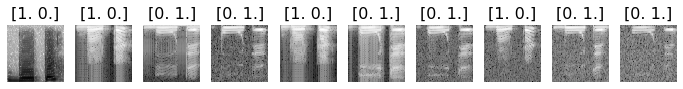

In [6]:
plots(imgs, titles=labels)

In [7]:
# build and train CNN

model = Sequential([
        # 2 dimentional convelutional layer
        # (3,3) is kernal size
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
         Dense(2, activation='softmax'),
    ])

In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 1s - loss: 1141.2858 - accuracy: 0.4500 - val_loss: 1122.1273 - val_accuracy: 0.5000
Epoch 2/5
 - 1s - loss: 567.5136 - accuracy: 0.5833 - val_loss: 2051.7224 - val_accuracy: 0.4375
Epoch 3/5
 - 1s - loss: 1027.7289 - accuracy: 0.5500 - val_loss: 1062.1984 - val_accuracy: 0.4375
Epoch 4/5
 - 1s - loss: 891.8540 - accuracy: 0.5250 - val_loss: 176.7651 - val_accuracy: 0.5000
Epoch 5/5
 - 1s - loss: 480.7850 - accuracy: 0.5278 - val_loss: 237.3323 - val_accuracy: 0.5000


C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


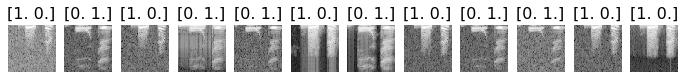

In [10]:
# predict

test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [13]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[0 6]
 [0 6]]


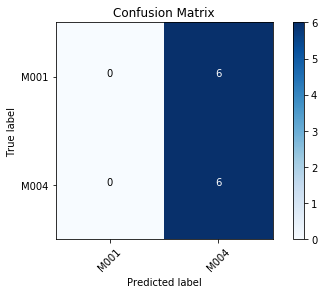

In [21]:
cm_plot_labels = ['M001','M004']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [20]:
import itertools

In [22]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 118s 0us/step


In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model)

keras.engine.training.Model

In [27]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [28]:
model.layers.pop()

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [30]:
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [33]:
# train the fine-tunes VGG16 model

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.fit_generator(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4,
                   epochs=5, verbose=2)

Epoch 1/5
 - 91s - loss: 0.6873 - accuracy: 0.6111 - val_loss: 0.6689 - val_accuracy: 0.5625
Epoch 2/5
 - 84s - loss: 0.7047 - accuracy: 0.4000 - val_loss: 0.7200 - val_accuracy: 0.3125
Epoch 3/5
 - 76s - loss: 0.6894 - accuracy: 0.5500 - val_loss: 0.7198 - val_accuracy: 0.6250
Epoch 4/5
 - 72s - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 5/5
 - 87s - loss: 0.6995 - accuracy: 0.4500 - val_loss: 0.6944 - val_accuracy: 0.5000


C:\Users\evrn_\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


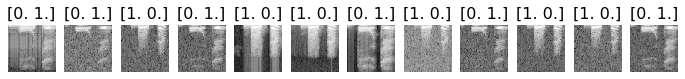

In [37]:
# predict using fine-tunes VGG16 model

test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [38]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.], dtype=float32)

In [39]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [42]:
cm = confusion_matrix(test_labels, np.round(predictions[:,1]))

Confusion matrix, without normalization
[[6 0]
 [6 0]]


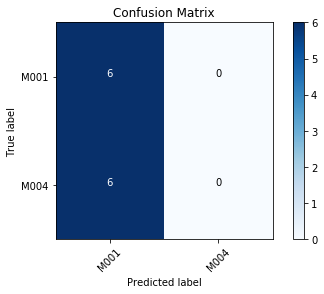

In [43]:
cm_plot_labels = ['M001','M004']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion Matrix')